In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['flower'] = df.target.apply(lambda x : iris.target_names[x])
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [11]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

In [12]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
x = df.drop(['target' , 'flower'] , axis = 1 )
y = df.target

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=5)

In [15]:
len(x_test)

30

# Creating KNN (K Nearest Neighbour Classifier)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5  )
knn.fit(x_train ,y_train)

KNeighborsClassifier()

In [24]:
knn.score(x_test , y_test)

0.9333333333333333

In [21]:
from sklearn.model_selection import GridSearchCV
clf  = GridSearchCV(KNeighborsClassifier() , {
    'n_neighbors':[1,2,3,4,5,20,15]
} , cv = 5 , return_train_score= False)

clf.fit(x_train , y_train )
df2 = pd.DataFrame(clf.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001995,0.000620,0.002201,0.000977,1,{'n_neighbors': 1},1.000000,1.000000,0.958333,0.958333,0.958333,0.975000,0.020412,2
1,0.001993,0.000640,0.001997,0.000025,2,{'n_neighbors': 2},0.958333,1.000000,0.958333,0.958333,0.958333,0.966667,0.016667,4
2,0.001397,0.000489,0.001996,0.000003,3,{'n_neighbors': 3},1.000000,1.000000,0.958333,0.958333,0.958333,0.975000,0.020412,2
3,0.001196,0.000398,0.001999,0.000005,4,{'n_neighbors': 4},1.000000,0.958333,0.958333,0.958333,0.958333,0.966667,0.016667,4
4,0.001596,0.000487,0.001994,0.000004,5,{'n_neighbors': 5},1.000000,1.000000,1.000000,0.958333,0.958333,0.983333,0.020412,1
5,0.001205,0.000395,0.001987,0.000016,20,{'n_neighbors': 20},0.958333,0.958333,0.916667,0.958333,0.958333,0.950000,0.016667,7
6,0.001396,0.000488,0.001795,0.000399,15,{'n_neighbors': 15},1.000000,0.916667,1.000000,0.958333,0.958333,0.966667,0.031180,6


In [22]:
print(clf.best_params_)
clf.best_score_

{'n_neighbors': 5}


0.9833333333333334

In [25]:
from sklearn.metrics import classification_report ,confusion_matrix
y_predict = knn.predict(x_test)
cm = confusion_matrix(y_test , y_predict)
cm


array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Actual')

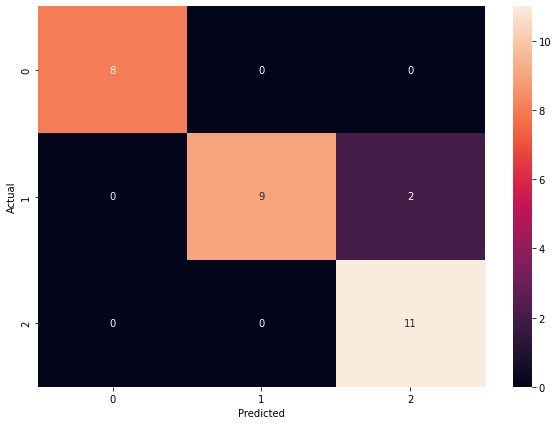

In [26]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

